# SESI 6

### Syaima Radestya - KS10

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("property_data.csv")

In [4]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [5]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [6]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [7]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [8]:
missing_values = ["n/a", "na", "--"]

In [9]:
df = pd.read_csv("property_data.csv", na_values = missing_values)

In [10]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

## Unexpected Missing Values

In [11]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [19]:
for idx, row in df['OWN_OCCUPIED'].iteritems():
    print(row, idx)

Y 0
N 1
N 2
nan 3
Y 4
Y 5
nan 6
Y 7
Y 8


In [24]:
# filter manual

# loop item yg ada di kolom OWN_OCCUPIED
for idx, row in df['OWN_OCCUPIED'].iteritems():
    if row == 'N' or row == 'Y' :
        pass
    else:
        # jika tidak memenuhi kondisi diatas, lakukan ini
        df.loc[idx, 'OWN_OCCUPIOD'] = np.nan

In [25]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [26]:
df["NUM_BATH"]

0         1
1       1.5
2         1
3       NaN
4         2
5         1
6    HURLEY
7         1
8         2
Name: NUM_BATH, dtype: object

In [32]:
# loop item yg ada di kolom NUM_BATH
for idx, row in df['NUM_BATH'].iteritems():
    if type(row) == str:
        if row.isnumeric():
            pass
    else:
        # jika tidak memenuhi kondisi diatas, lakukan ini
        df.loc[idx, 'NUM_BATH'] = np.nan

In [33]:
df['NUM_BATH']

0         1
1       NaN
2         1
3       NaN
4         2
5         1
6    HURLEY
7         1
8         2
Name: NUM_BATH, dtype: object

In [12]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [34]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,OWN_OCCUPIOD
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0,NaN
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,NaN,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0,NaN
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0,NaN
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0,NaN
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0,NaN
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0,NaN
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0,NaN


In [13]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [14]:
# Summarizing Missing Values

df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [15]:
# Replacing
df['ST_NUM'].fillna(125, inplace=True)

In [16]:
df.loc[2, 'ST_NUM'] = 125

In [17]:
from msilib.schema import Media
from statistics import median

In [18]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [35]:
# xlrd
import matplotlib.pyplot as plt

data = pd.ExcelFile('obes.xls')

In [36]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [38]:
data_age = data.parse('7.2', skiprows=4, skipfooter=14)
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [39]:
data_age.tail()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0
11,2012/13,10957.0,556.0,356.0,1437.0,2744.0,3305.0,1965.0,495.0,99.0


In [40]:
data_age.dropna(inplace=True)

In [41]:
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [44]:
data_age.rename(columns={'Unnamed: 0':'Year'}, inplace=True)

In [45]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [46]:
data_age.set_index('Year', inplace=True)
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


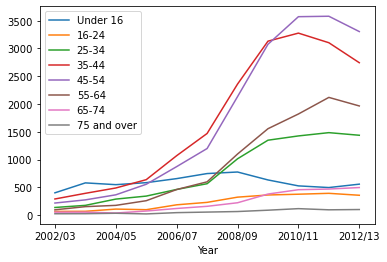

In [48]:
data_age_fix = data_age.drop('Total', axis=1)
data_age_fix.plot();

# Time Series

In [50]:
URL = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv"

In [51]:
opsd_daily = pd.read_csv(URL)

In [52]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [53]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [57]:
opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'])
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [58]:

opsd_daily.set_index('Date', inplace=True)
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [60]:
kondisi1 = opsd_daily.index.day==15
kondisi2 = opsd_daily.index.year==2016
opsd_daily[kondisi1 & kondisi2]

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2016-01-15,1589.380,150.572,8.690,159.262
2016-02-15,1565.899,213.620,23.473,237.093
2016-03-15,1568.054,158.489,35.241,193.730
2016-04-15,1429.323,216.470,77.301,293.771
2016-05-15,1048.215,391.687,130.935,522.622
2016-06-15,1408.312,52.425,142.133,194.558
2016-07-15,1362.975,287.953,129.004,416.957
2016-08-15,1286.423,64.967,173.784,238.751
2016-09-15,1436.421,263.849,153.038,416.887


<AxesSubplot:xlabel='Date'>

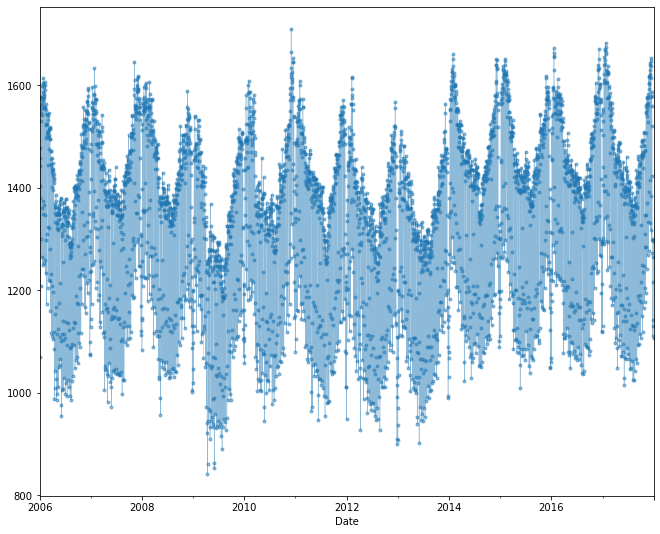

In [67]:
# visualisasi sederhana
opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linewidth=0.5, figsize=(11,9))

<AxesSubplot:xlabel='Date'>

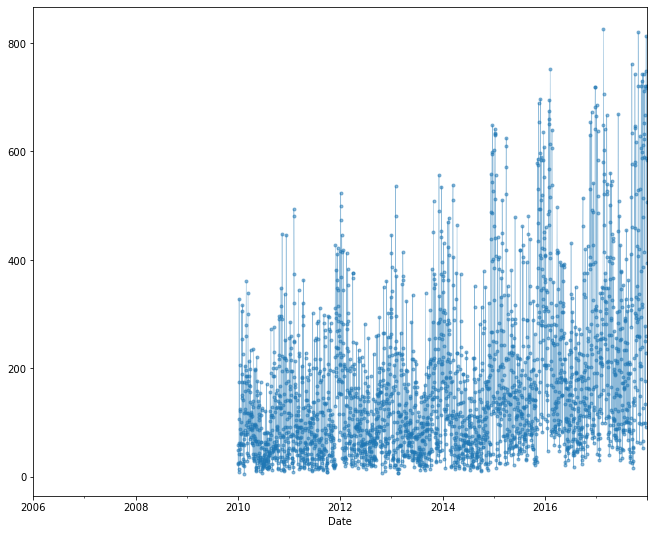

In [68]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linewidth=0.5, figsize=(11,9))